In [1]:
from functions import extract_LAI_from_RAS_file, explore_image, extract_all_LAI_from_RAS_file, extract_image_from_RAS_file, extract_image_from_RAS_file_cupd
import matplotlib.pyplot as plt
import torch
import numpy as np

/home/luser/anaconda3/envs/stelar/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = './dataset/lai_ras/'

In [3]:
image_length = 10980

image_width = 10980

select_image = 0

#for i in range(1):
#k=i+1
#year = 20
#month=1

In [4]:
import glob
filepaths = glob.glob('./dataset/lai_ras/*.RAS')

filepaths.sort()
filepaths = filepaths[:2]
#print("filepaths", filepaths)

datapath_filename = filepaths[0]
filename = '32UQV_2001.RAS'
#print("datapath_filename", datapath_filename)

In [5]:
len(filepaths)

2

In [6]:
'''for datapath_filename in filepaths:
    print("datapath_filename", datapath_filename)
    test = extract_all_LAI_from_RAS_file(datapath_filename, image_length, image_width)
    print(test.shape)'''

'for datapath_filename in filepaths:\n    print("datapath_filename", datapath_filename)\n    test = extract_all_LAI_from_RAS_file(datapath_filename, image_length, image_width)\n    print(test.shape)'

In [147]:
filename = '32UQV_2001.RAS'
image_length = 10980
image_width = 10980
select_image = 0
img, img_array = extract_image_from_RAS_file_cupd(datapath, filename, image_length, image_width, select_image)

In [42]:
lai_array = np.load('./dataset/processed_lai_npy/32UQV_2001_measure_0.npy')

#make the unknown values 0
lai_array[lai_array<0] = 0
#normalize the values
lai_array = lai_array/lai_array.max()

In [43]:
np.unique(lai_array).shape


(71,)

In [44]:
np.unique(lai_array).shape

(71,)

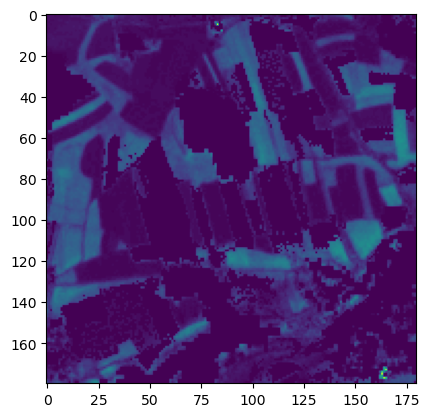

In [45]:
plt.imshow(lai_array[:180,:180])

In [46]:
dots_in_range = 20
#chnl_2_range = 4
#chnl_3_range = 4


ch0_dist = np.linspace(lai_array.min(), lai_array.max(), dots_in_range)
#ch1_dist = np.linspace(img_array[:,:,1].min(), img_array[:,:,1].max(), chnl_2_range).astype(int)
#ch2_dist = np.linspace(img_array[:,:,2].min(), img_array[:,:,2].max(), chnl_3_range).astype(int)

In [47]:
ch0_dist

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [48]:
for i in range(len(ch0_dist)):
    #print("lai_array - ch0_dist[i]", lai_array - ch0_dist[i])
    lai_array[abs(lai_array - ch0_dist[i]) <= ch0_dist[1]/2] = ch0_dist[i]

'''for i in range(len(ch1_dist)):
    img_array[:,:,1][abs(img_array[:,:,1] - ch1_dist[i]) <= ch1_dist[1]/2] = ch1_dist[i]

for i in range(len(ch2_dist)):
    img_array[:,:,2][abs(img_array[:,:,2] - ch2_dist[i]) <= ch2_dist[1]/2] = ch2_dist[i]'''

'for i in range(len(ch1_dist)):\n    img_array[:,:,1][abs(img_array[:,:,1] - ch1_dist[i]) <= ch1_dist[1]/2] = ch1_dist[i]\n\nfor i in range(len(ch2_dist)):\n    img_array[:,:,2][abs(img_array[:,:,2] - ch2_dist[i]) <= ch2_dist[1]/2] = ch2_dist[i]'

In [49]:
np.unique(lai_array)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [50]:
lai_array = (lai_array*10).astype(int)

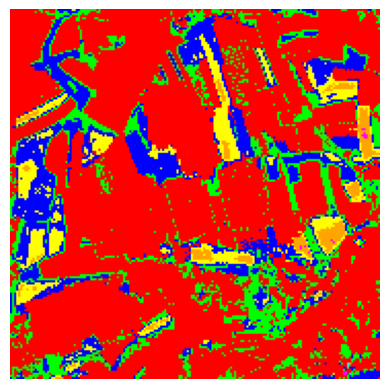

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Example segmented image (assuming it's already available)
segmented_image = np.array([[0, 0, 1, 1],
                            [0, 2, 2, 1],
                            [2, 2, 2, 1]])

segmented_image = lai_array[:180,:180]

color_map = {0: [255, 0, 0],        # Red
             1: [0, 255, 0],        # Green
             2: [0, 0, 255],        # Blue
             3: [255, 255, 0],      # Yellow
             4: [255, 165, 0],      # Orange
             5: [255, 0, 255],      # Magenta
             6: [0, 255, 255],      # Cyan
             7: [128, 0, 128],      # Violet
             8: [128, 128, 0],      # Olive
             9: [0, 128, 0],        # Dark Green
             10: [128, 0, 0]}       # Maroon



# Create color plot
colored_image = np.zeros(segmented_image.shape + (3,), dtype=np.uint8)
for i in range(segmented_image.shape[0]):
    for j in range(segmented_image.shape[1]):
        segment_id = segmented_image[i, j]
        colored_image[i, j] = color_map[segment_id]

# Display the color plot
plt.imshow(colored_image)
plt.axis('off')
plt.show()
